In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\Public\\Projects\\heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# to check anu null values are there or not
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data.shape

(918, 12)

In [13]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
Sex = le.fit_transform(data['Sex'])
ChestPainType = le.fit_transform(data['ChestPainType'])
RestingECG = le.fit_transform(data['RestingECG'])
ExerciseAngina = le.fit_transform(data['ExerciseAngina'])
ST_Slope = le.fit_transform(data['ST_Slope'])

In [18]:
data['Sex'] = Sex
data['ChestPainType'] = ChestPainType
data['RestingECG'] = RestingECG
data['ExerciseAngina'] = ExerciseAngina
data['ST_Slope'] = ST_Slope

In [19]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [20]:
#Seperating data into x,y 
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [25]:
x_train.shape

(688, 11)

In [26]:
x_test.shape

(230, 11)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Jayateerth haribhatt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
a = model.score(x_train,y_train)
b = model.score(x_test,y_test)
print(a)
print(b)

0.8546511627906976
0.8347826086956521


In [34]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
model.acc = accuracy_score(y_test,y_pred)
print(model.acc)

0.8347826086956521


# compairing this data in various Algorithms

# DecissionTree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier()
model_1.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred = model_1.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn import tree

In [50]:
model_1.acc = accuracy_score(y_test,y_pred)
model_1.acc

0.8

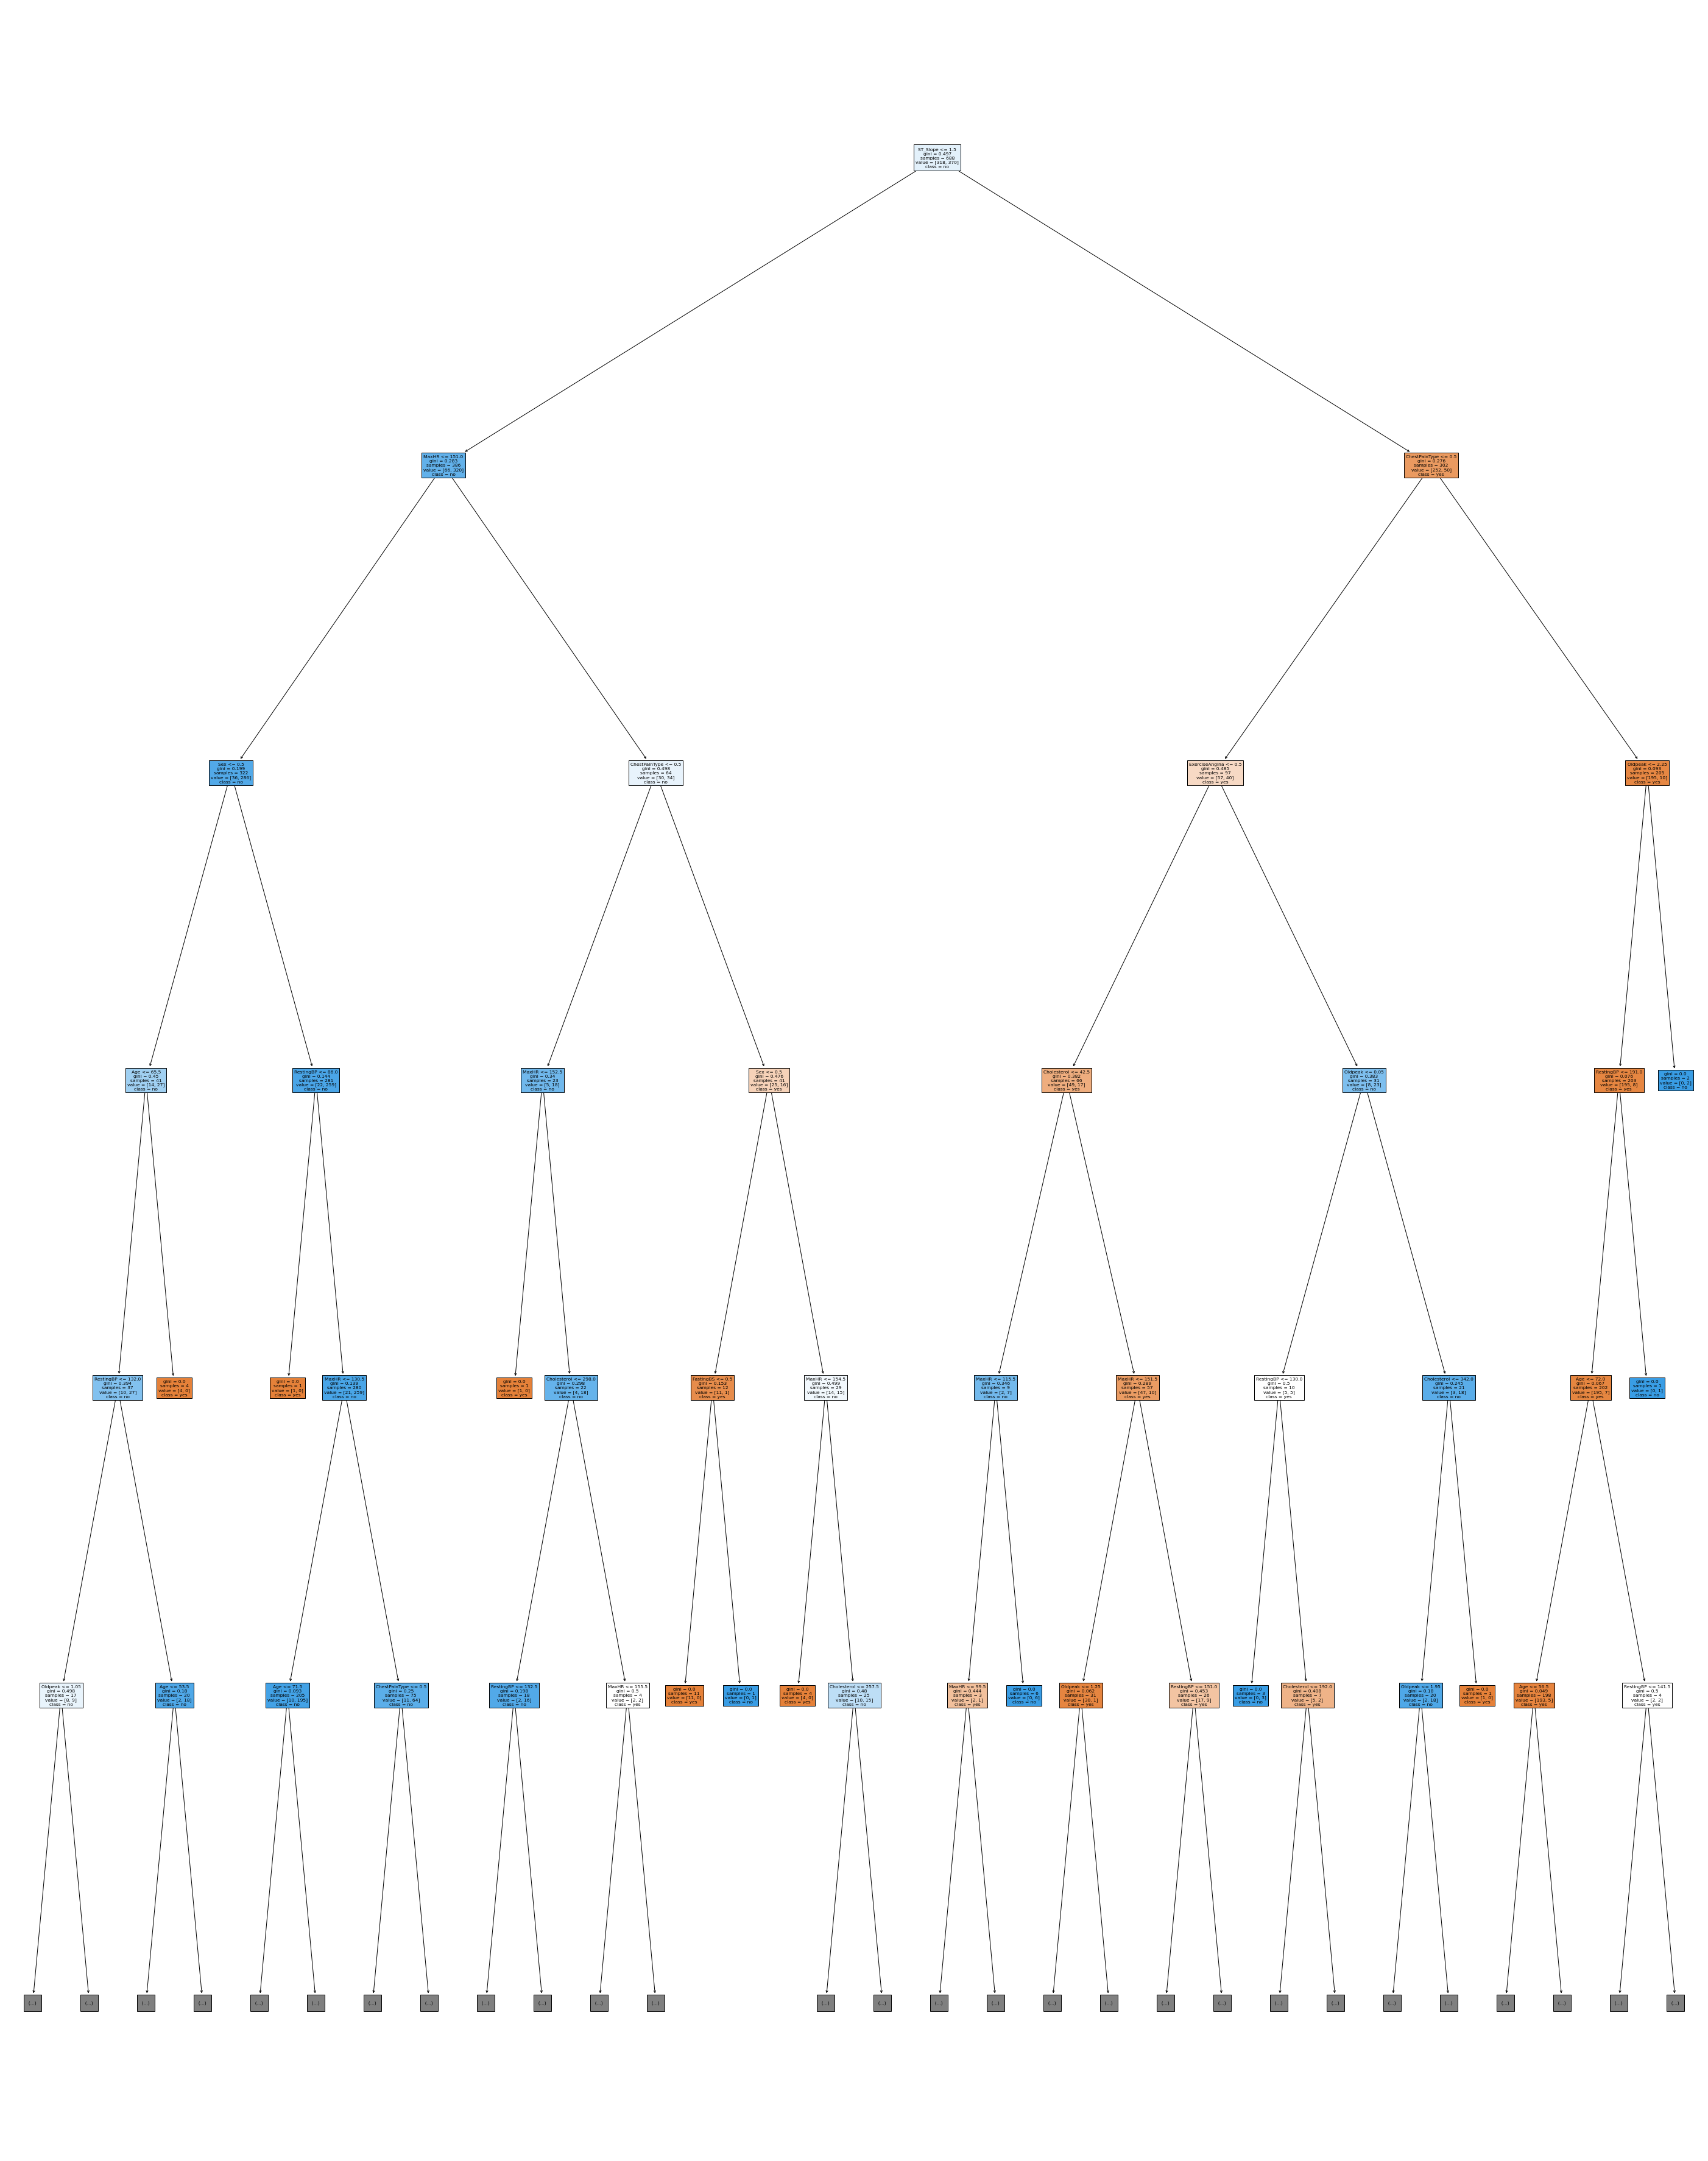

In [51]:
plt.figure(figsize = (50,65))
_ = tree.plot_tree(model_1,max_depth=5,feature_names=data.columns[:-1],class_names=['yes','no'],filled = True)

# GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid ={
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,5,7,5,8],
    'max_features' : [4,7,5,8,9]
}
model = DecisionTreeClassifier()
gridsearch = GridSearchCV(estimator=model,param_grid=param_grid,cv=10)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7, 5, 8],
                         'max_features': [4, 7, 5, 8, 9]})

In [61]:
a = gridsearch.best_params_
b = gridsearch.best_score_
print(a)
print(b)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 8}
0.845907928388747


In [63]:
best_model = gridsearch.best_estimator_
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
best_model.acc = accuracy_score(y_test,y_pred)
print(best_model.acc)

0.8347826086956521


# RandomizedSearchCV

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : randint(2,8),
    'max_features' : randint(2,8)
}
model = DecisionTreeClassifier()
random_search = RandomizedSearchCV(estimator=model,param_distributions=param,cv=10,n_iter=20)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B435B939A0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B435E47B20>})

In [68]:
best_model2 = random_search.best_estimator_
best_model2.fit(x_train,y_train)
y_pred = best_model2.predict(x_test)
best_model2.acc = accuracy_score(y_test,y_pred)
print(best_model2.acc)

0.8260869565217391


# SVM 

In [69]:
from sklearn.svm import SVC
model_2 = SVC(kernel='linear')
model_2.fit(x_train,y_train)

SVC(kernel='linear')

In [70]:
y_pred = model_2.predict(x_test)
model_2.acc = accuracy_score(y_test,y_pred)
print(model_2.acc)

0.8304347826086956


# Random Forest 

In [71]:
# Using gini index as criterion for random forest
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(criterion='gini')
model_3.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
y_pred = model_3.predict(x_test)
model_3.acc = accuracy_score(y_test,y_pred)
print(model_3.acc)

0.8782608695652174


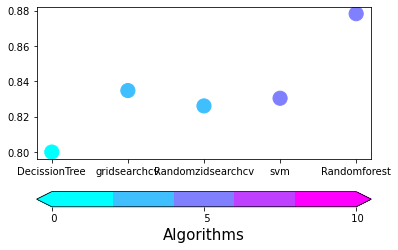

In [102]:
# differnce in accuracy_score is showed in scatter plot
x = ['DecissionTree','gridsearchcv','Randomzidsearchcv','svm','Randomforest']
y = [model_1.acc,best_model.acc,best_model2.acc,model_2.acc,model_3.acc]
colors = [1,2,3,4,5]
plt.scatter(x,y, s= 200,c=colors, cmap=plt.cm.get_cmap('cool',5))
cbar = plt.colorbar(orientation = 'horizontal',extend ='both',pad = 0.15,shrink=1,aspect=20,format='%3.f')
cbar.set_label(label = 'Algorithms',size = 15)
cbar.set_ticks([0,5,10])
plt.clim(0,10)
plt.show()